In [1]:
import numpy as np
from sklearn.manifold import TSNE
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle
G = nx.Graph()
D = nx.Graph()

In [2]:
def load_obj(name ):
    with open('embeddings/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
import pandas as pd

data = pd.read_csv('data/final.csv')
data

In [ ]:
data = data[data['weapon_type'] != 'UNKNOWN']
data = data[data['apt_country'] != 'unknown']
data = data[data['delivery_method'] != 'UNKNOWN']
data

In [ ]:
data['report_weapon'] = data['report_id'].apply(str) + '_' + data['weapon_type']

In [ ]:
df = data[['report_id', 'weapon_type', 'apt_country', 'report_weapon']]
report_ids = []
weaponTypes = []
sets = df.report_weapon.unique()
for s in sets:
    report_id = (df[df['report_weapon'] == s]['report_weapon']).unique()
    w = (df[df['report_weapon'] == s]['weapon_type']).unique()
    report_ids.append(report_id[0])
    weaponTypes.append(w[0])
df = pd.DataFrame({'report_id': report_ids, 'weapon': weaponTypes})
df.to_csv('dataframe.csv', index=False)

In [ ]:
D.add_nodes_from(df['report_id'].unique(), color='blue')
D.add_nodes_from(df['weapon'].unique(), color='red')

In [ ]:
for index, row in df.iterrows():
    D.add_edge(row['report_id'], row['weapon'])
#     G.add_edge(row['delivery_method'], row['apt_country'])

In [ ]:
report_id = df['report_id'].unique()
weapon_type = df['weapon'].unique()
factors = weapon_type
factors
# factors = np.hstack([weapon_type, countries])

In [3]:
t = load_obj('R1')
t

{'R1': array([-9.6948730e-04, -4.8736138e-03, -1.2834485e-03,  5.0589447e-03,
        -3.0902370e-03, -3.1862136e-03, -1.5564570e-03, -1.9653069e-04,
         2.4782370e-03,  4.0942868e-03, -1.2621616e-03, -5.0091720e-03,
         6.0260799e-03,  2.3184137e-03, -2.5353977e-03,  2.5555068e-03,
         1.4519771e-03,  1.8554103e-03,  9.0123230e-04,  3.0141766e-03,
        -8.5654698e-04,  2.8345396e-03, -7.5428141e-04,  2.6645491e-04,
         3.4230079e-03, -3.1485669e-03,  2.1001690e-05, -1.5883383e-03,
        -1.7489323e-03,  2.7664925e-03,  3.8209990e-05, -1.4308590e-03,
        -8.5007976e-04,  2.9109232e-03,  1.4075030e-03, -3.1542766e-03,
        -2.6329185e-03, -2.3611533e-03, -2.7954893e-03, -4.3321692e-04,
        -2.7365095e-03, -2.6590207e-03, -2.7647691e-03,  2.3634206e-03,
         1.5503094e-03,  3.6838665e-03,  3.0119596e-03,  2.6679244e-03,
         2.9113244e-03,  1.3505459e-03,  3.3137356e-03,  3.9355918e-03,
         4.2623337e-03,  1.9511004e-03, -2.4495325e-03, -8

In [7]:
report_nodes = t.keys()
report_nodes

143

In [5]:
embeddings = []
for report in report_nodes:
    embeddings.append(t[report])
embeddings = np.array(embeddings)
embeddings

array([[-9.6948730e-04, -4.8736138e-03, -1.2834485e-03, ...,
         1.9773596e-03, -4.3221019e-04,  4.5214598e-03],
       [ 1.8853507e-03,  1.4300723e-04,  3.6712470e-03, ...,
        -2.5630381e-03, -3.3245138e-03,  1.4704301e-03],
       [-8.7663764e-05, -1.9444534e-04, -3.0306256e-03, ...,
        -4.3696454e-03, -4.2632036e-03,  1.5606703e-03],
       ...,
       [-5.5336335e-04, -2.0440335e-03, -3.0311772e-03, ...,
         1.8024384e-03,  2.8370069e-03, -1.1988989e-03],
       [-3.7979800e-03,  1.5626164e-03, -9.4528124e-04, ...,
         8.1349642e-04, -3.7372932e-03,  2.9016593e-03],
       [-4.5547881e-03, -1.3495871e-03, -2.1904807e-03, ...,
        -3.3953884e-03, -1.3580841e-03,  1.3757697e-03]], dtype=float32)

In [6]:
embeddings.shape

(143, 128)

In [12]:
test = np.reshape(embeddings, (1, -1))
test.shape

(1, 18304)

In [13]:
embeddings = test

In [14]:
tsne = TSNE(n_components=2, random_state=3, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

ValueError: Found array with 1 sample(s) (shape=(1, 18304)) while a minimum of 2 is required.

In [15]:
weapon_colors = {
    'HWP': 'teal', 'WSF': 'r', 'EXCEL': 'g', 'EXE': 'b', 
    'WORD': 'lightgreen', 'MHTML': 'brown', 'RTF': 'orange', 'POWERPOINT': 'y',
    'TROJAN': 'crimson', 'HTTP': 'darkred', 'HTML': 'violet', 'RAR': 'purple', 
    'BAT': 'tomato', 'PE': 'lightblue', 'ZIP': 'gainsboro', 'PNG': 'beige', 'BLOG': 'chocolate',
    'JPG' : 'black', 'PDF': 'coral', 'MP4': 'cyan', 'HTA': 'grey', 'JPEG': 'darksalmon', 'DLL': 'deeppink'
}

df['color'] = df['weapon'].apply(lambda x: weapon_colors[x])
report_colors = dict(zip(df['report_id'], df['color']))
colors = [report_colors[x] for x in report_nodes]

NameError: name 'df' is not defined

No handles with labels found to put in legend.


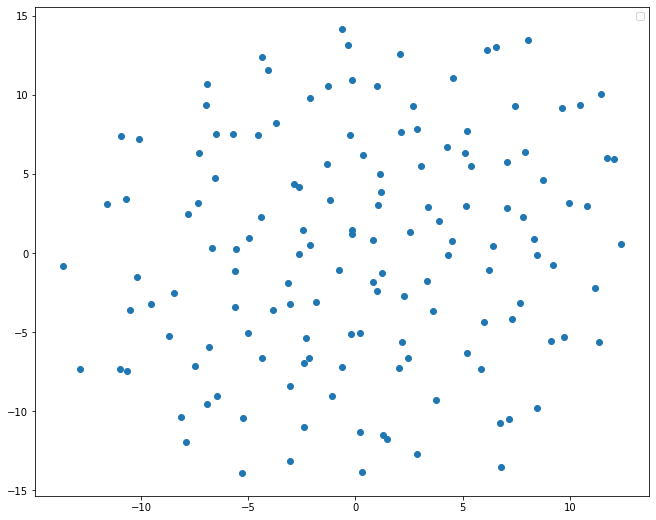

In [16]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

# ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
#att_patches = [mpatches.Patch(color=color, label=weapon) for weapon, color in weapon_colors.items()]
# ax.legend(handles=att_patches)
ax.legend()